# Monte Carlo Tests Part 2

## with surveys with different valies of sigma_estimated, what does the global value we derived correspond to?

In [1]:
import matplotlib.pyplot as plt
from   matplotlib.pyplot import *
import sys
import pylab as pl
import numpy as np
from   copy import copy
import pandas
from astropy.io import fits
from astropy.table import Table, Column
import os.path                                                                                                                                                                       
from numpy import genfromtxt
from math import *
from astropy.coordinates import SkyCoord
import pandas as pd  
import scipy.stats
from scipy import stats

from scipy import optimize

import seaborn as sns

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
# L1
des_syserr=np.array([0.03,0.02,0.02])
cfht_syserr=np.array([0.08,0.08,0.08])
hsc_syserr=np.array([0.05,0.05,0.05])
cs82_syserr=np.array([0.06,0.06,0.06])
kids_syserr=np.array([0.03,0.03,0.03])
sdss_syserr=np.array([0.06,0.06,0.06])

for i in range(0,3):
    m=des_syserr[i]+cfht_syserr[i]+hsc_syserr[i]+cs82_syserr[i]+kids_syserr[i]+sdss_syserr[i]
    m=m/6.0
    print(m)

0.051666666666666666
0.05000000000000001
0.05000000000000001


In [3]:
# L2
des_syserr=np.array([0.03,0.02,0.02])
cfht_syserr=np.array([0.08,0.08,0.08])
hsc_syserr=np.array([0.05,0.05,0.05])
cs82_syserr=np.array([0.06,0.06,0.06])
kids_syserr=np.array([0.03,0.03,0.03])
sdss_syserr=np.array([0.06,0.06,0.06])

for i in range(0,3):
    m=des_syserr[i]+cfht_syserr[i]+hsc_syserr[i]+cs82_syserr[i]+kids_syserr[i]+sdss_syserr[i]
    m=m/6.0
    print(m)

0.051666666666666666
0.05000000000000001
0.05000000000000001


In [4]:
# C1
des_syserr=np.array([0.02,0.02,0.02])
cfht_syserr=np.array([0.11,0.11,0.11])
hsc_syserr=np.array([0.05,0.05,0.05])
cs82_syserr=np.array([0.06,0.06,0.06])
kids_syserr=np.array([0.04,0.04,0.04])

for i in range(0,3):
    m=des_syserr[i]+cfht_syserr[i]+hsc_syserr[i]+cs82_syserr[i]+kids_syserr[i]
    m=m/5.0
    print(m)

0.055999999999999994
0.055999999999999994
0.055999999999999994


In [5]:
# C1 no CFHTLENS
des_syserr=np.array([0.02,0.02,0.02])
cfht_syserr=np.array([0.11,0.11,0.11])
hsc_syserr=np.array([0.05,0.05,0.05])
cs82_syserr=np.array([0.06,0.06,0.06])
kids_syserr=np.array([0.04,0.04,0.04])

for i in range(0,3):
    m=des_syserr[i]+hsc_syserr[i]+cs82_syserr[i]+kids_syserr[i]
    m=m/4.0
    print(m)

0.0425
0.0425
0.0425


In [6]:
# C2
des_syserr=np.array([0.03,0.03,0.03])
cfht_syserr=np.array([0.11,0.11,0.11])
hsc_syserr=np.array([0.05,0.05,0.05])
cs82_syserr=np.array([0.06,0.06,0.06])
kids_syserr=np.array([0.04,0.04,0.04])

for i in range(0,3):
    m=des_syserr[i]+cfht_syserr[i]+hsc_syserr[i]+cs82_syserr[i]+kids_syserr[i]
    m=m/5.0
    print(m)

0.057999999999999996
0.057999999999999996
0.057999999999999996


In [7]:
# C2
# No CFHTLenS
des_syserr=np.array([0.03,0.03,0.03])
cfht_syserr=np.array([0.11,0.11,0.11])
hsc_syserr=np.array([0.05,0.05,0.05])
cs82_syserr=np.array([0.06,0.06,0.06])
kids_syserr=np.array([0.04,0.04,0.04])

for i in range(0,3):
    m=des_syserr[i]+hsc_syserr[i]+cs82_syserr[i]+kids_syserr[i]
    m=m/4.0
    print(m)

0.045000000000000005
0.045000000000000005
0.045000000000000005


In [8]:
# Wtot files are used as the baseline

# Amplitude files are in this order
# row 1: small R, row2: large R, row3: all R

# Amplitude arrays
amparray_wtot=[]
amparray_wtot.append("LOWZ_0.15_0.31_amplitudes_wtot.txt")
amparray_wtot.append("LOWZ_0.31_0.43_amplitudes_wtot.txt")
amparray_wtot.append("CMASS_0.43_0.54_amplitudes_wtot.txt")
amparray_wtot.append("CMASS_0.54_0.7_amplitudes_wtot.txt")

amparray_errs_wtot=[]
amparray_errs_wtot.append("LOWZ_0.15_0.31_amplitudes_errs_wtot.txt")
amparray_errs_wtot.append("LOWZ_0.31_0.43_amplitudes_errs_wtot.txt")
amparray_errs_wtot.append("CMASS_0.43_0.54_amplitudes_errs_wtot.txt")
amparray_errs_wtot.append("CMASS_0.54_0.7_amplitudes_errs_wtot.txt")

amparray_now=[]
amparray_now.append("LOWZ_0.15_0.31_amplitudes_now.txt")
amparray_now.append("LOWZ_0.31_0.43_amplitudes_now.txt")
amparray_now.append("CMASS_0.43_0.54_amplitudes_now.txt")
amparray_now.append("CMASS_0.54_0.7_amplitudes_now.txt")

amparray_errs_now=[]
amparray_errs_now.append("LOWZ_0.15_0.31_amplitudes_errs_now.txt")
amparray_errs_now.append("LOWZ_0.31_0.43_amplitudes_errs_now.txt")
amparray_errs_now.append("CMASS_0.43_0.54_amplitudes_errs_now.txt")
amparray_errs_now.append("CMASS_0.54_0.7_amplitudes_errs_now.txt")

# Internal Nstar test with HSC
amparray_hscnstar=[]
amparray_hscnstar.append("HSC_CMASS_0.54_0.70_nstartests_amplitudes.txt")

amparray_errs_hscnstar=[]
amparray_errs_hscnstar.append("HSC_CMASS_0.54_0.70_nstartests_amplitudes_errs.txt")

In [9]:
# Provide data and errors, and sigma_sys, return reduced chi2-1 with weighed mean
# Data and errors passed as globals
def computechi2minus1(sigs):
    
    global data2
    global errs2
    
    n=len(data2)
    
    # inverse variance mean
    w = np.zeros(n)
    for i in range(0, n):
        w[i]=1.0/(errs2[i]**2)
    
    wmean = np.average(data2, weights=w)
    
    #Compute reduced chi2
    chi2=0.0

    for i in range(0, n):
        chi2+=((data2[i]-wmean)**2)/(errs2[i]**2+sigs**2)
    
    rchi2 = chi2/(n-1)

    # Reduced chi2 -1
    return rchi2-1

# ----- L1 --------

In [10]:
# lensbin=0=L1, lensbin=1=L2 lensbin=2=L3 lensbin=3=L4

lensbin=0
ntest=5000

sigest_low = np.zeros(ntest)
sigest_high = np.zeros(ntest)
sigest_all = np.zeros(ntest)

r = lensbin
    
des_syserr=np.array([0.03,0.02,0.02])
cfht_syserr=np.array([0.08,0.08,0.08])
hsc_syserr=np.array([0.05,0.05,0.05])
cs82_syserr=np.array([0.06,0.06,0.06])
kids_syserr=np.array([0.03,0.03,0.03])
sdss_syserr=np.array([0.06,0.06,0.06])

for k in range(0,ntest):
        
    for c in range(0,3):   # Each column is a different radial range
                 
        # Read in the files
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])         
           
        # Now draw new amplitudes with this statistical and sys error
        #print(allamp)
            
        # Compute the weighted mean
        # inverse variance mean     
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        
        # this is where the main part of the test is
        # Expect an amplitude of 0
        # for each survey draw an amplitude with mean of 1 and
        # including statistical and systematic error
        # Note that not all sys errors mean exactly the same thing though
        
        # Now add statistical and systematic error to data vecor
        # Statistical is drawn each time anew for each radial bin
        # systematic is an offset that is the same in all bins
        
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        data[0] = 0 + np.random.normal(0,errs[0],1)[0]+ np.random.normal(0,des_syserr[c],1)[0]
        data[1] = 0 + np.random.normal(0,errs[1],1)[0]+ np.random.normal(0,cfht_syserr[c],1)[0]
        data[2] = 0 + np.random.normal(0,errs[2],1)[0]+ np.random.normal(0,hsc_syserr[c],1)[0]
        data[3] = 0 + np.random.normal(0,errs[3],1)[0]+ np.random.normal(0,cs82_syserr[c],1)[0]
        data[4] = 0 + np.random.normal(0,errs[4],1)[0]+ np.random.normal(0,kids_syserr[c],1)[0]

        if(r<=2):
            data[5] = 0 + np.random.normal(0,errs[0],1)[0]+ np.random.normal(0,sdss_syserr[c],1)[0]

        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean
        wmean = np.average(data, weights=wht) # inverse variance mean
            
        n=len(data)
        data2 = np.zeros(n)
        errs2 = np.zeros(n) 
        
        #Compute reduced chi2
        chi2=0.0

        for i in range(0, n):
            chi2+=((data[i]-wmean)**2)/(errs[i]**2)
    
        rchi2 = chi2/(n-1)
        #print("Reduced chi2: ", rchi2)
    
        # This is the Sigma SYS part
        # Sigmasys is value that sets chi=1
    
        # If reduces chi2 >1 then proceed 
        if (rchi2>1):
        
            # Find the value that makes rchi2=1
            # Set global variables
            for i in range(0, n):
                data2[i]=data[i]
                errs2[i]=errs[i]
                
            #print(data2)
            #print(errs2)

            sol=optimize.root_scalar(computechi2minus1, bracket=[0,2.0])
            sigmasys=sol.root  
            
            if(c==0):
                sigest_low[k]=sigmasys  
            if(c==1):
                sigest_high[k]=sigmasys 
            if(c==2):
                sigest_all[k]=sigmasys 
            
        # this is a kludge
        # because we only get an upper limit in this case
        # this is why the paper says "estimate" for this number
        #if (rchi2<1):
        # do nothing. Tested and didn't have huge impact.
                            

Mean sys err 0.051666666666666666
0.051458807061953736 0.05203023160532693 0.051666666666666666


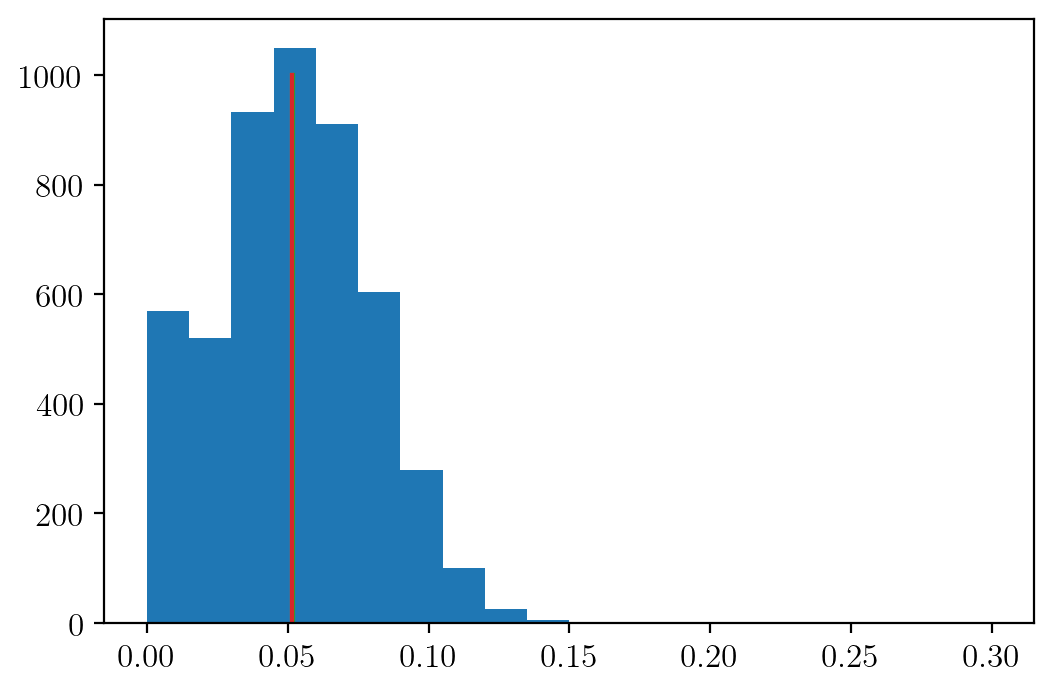

In [11]:
c=0
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)

Mean sys err 0.05000000000000001
0.05879092016156089 0.05893370803141518 0.05000000000000001


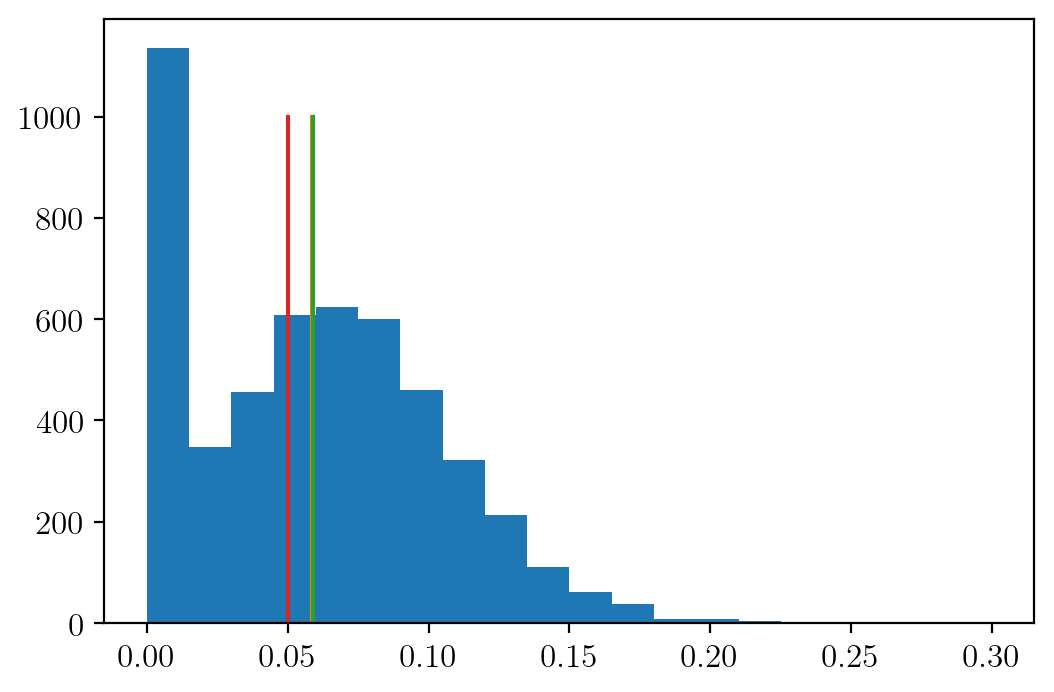

In [12]:
c=1
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)

Mean sys err 0.05000000000000001
0.0515308609725412 0.052081191481869 0.05000000000000001


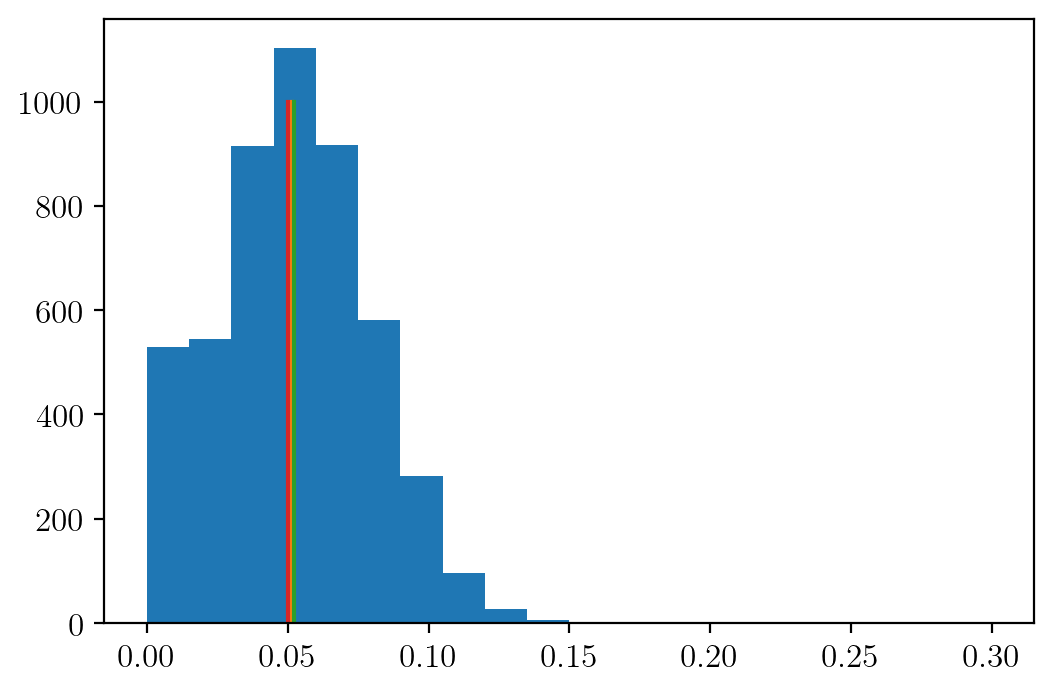

In [13]:
c=2
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)

# ------ L2 -------

In [14]:
lensbin=1
ntest=5000

sigest_low = np.zeros(ntest)
sigest_high = np.zeros(ntest)
sigest_all = np.zeros(ntest)

r = lensbin
    
des_syserr=np.array([0.03,0.02,0.02])
cfht_syserr=np.array([0.08,0.08,0.08])
hsc_syserr=np.array([0.05,0.05,0.05])
cs82_syserr=np.array([0.06,0.06,0.06])
kids_syserr=np.array([0.03,0.03,0.03])
sdss_syserr=np.array([0.06,0.06,0.06])

for k in range(0,ntest):
        
    for c in range(0,3):   # Each column is a different radial range
                 
        # Read in the files
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])         
           
        # Now draw new amplitudes with this statistical and sys error
        #print(allamp)
            
        # Compute the weighted mean
        # inverse variance mean     
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        
        # this is where the main part of the test is
        # Expect an amplitude of 0
        # for each survey draw an amplitude with mean of 1 and
        # including statistical and systematic error
        # Note that not all sys errors mean exactly the same thing though
        
        # Now add statistical and systematic error to data vecor
        # Statistical is drawn each time anew for each radial bin
        # systematic is an offset that is the same in all bins
        
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        data[0] = 0 + np.random.normal(0,errs[0],1)[0]+ np.random.normal(0,des_syserr[c],1)[0]
        data[1] = 0 + np.random.normal(0,errs[1],1)[0]+ np.random.normal(0,cfht_syserr[c],1)[0]
        data[2] = 0 + np.random.normal(0,errs[2],1)[0]+ np.random.normal(0,hsc_syserr[c],1)[0]
        data[3] = 0 + np.random.normal(0,errs[3],1)[0]+ np.random.normal(0,cs82_syserr[c],1)[0]
        data[4] = 0 + np.random.normal(0,errs[4],1)[0]+ np.random.normal(0,kids_syserr[c],1)[0]

        if(r<=2):
            data[5] = 0 + np.random.normal(0,errs[0],1)[0]+ np.random.normal(0,sdss_syserr[c],1)[0]

        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean
        wmean = np.average(data, weights=wht) # inverse variance mean
            
        n=len(data)
        data2 = np.zeros(n)
        errs2 = np.zeros(n) 
        
        #Compute reduced chi2
        chi2=0.0

        for i in range(0, n):
            chi2+=((data[i]-wmean)**2)/(errs[i]**2)
    
        rchi2 = chi2/(n-1)
        #print("Reduced chi2: ", rchi2)
    
        # This is the Sigma SYS part
        # Sigmasys is value that sets chi=1
    
        # If reduces chi2 >1 then proceed 
        if (rchi2>1):
        
            # Find the value that makes rchi2=1
            # Set global variables
            for i in range(0, n):
                data2[i]=data[i]
                errs2[i]=errs[i]
                
            #print(data2)
            #print(errs2)

            sol=optimize.root_scalar(computechi2minus1, bracket=[0,2.0])
            sigmasys=sol.root  
            
            if(c==0):
                sigest_low[k]=sigmasys  
            if(c==1):
                sigest_high[k]=sigmasys 
            if(c==2):
                sigest_all[k]=sigmasys 
            
        # this is a kludge
        # because we only get an upper limit in this case
        # this is why the paper says "estimate" for this number
        #if (rchi2<1):
        # do nothing. Tested and didn't have huge impact.
                            

Mean sys err 0.051666666666666666
0.05149480279033926 0.05224484242871297 0.051666666666666666


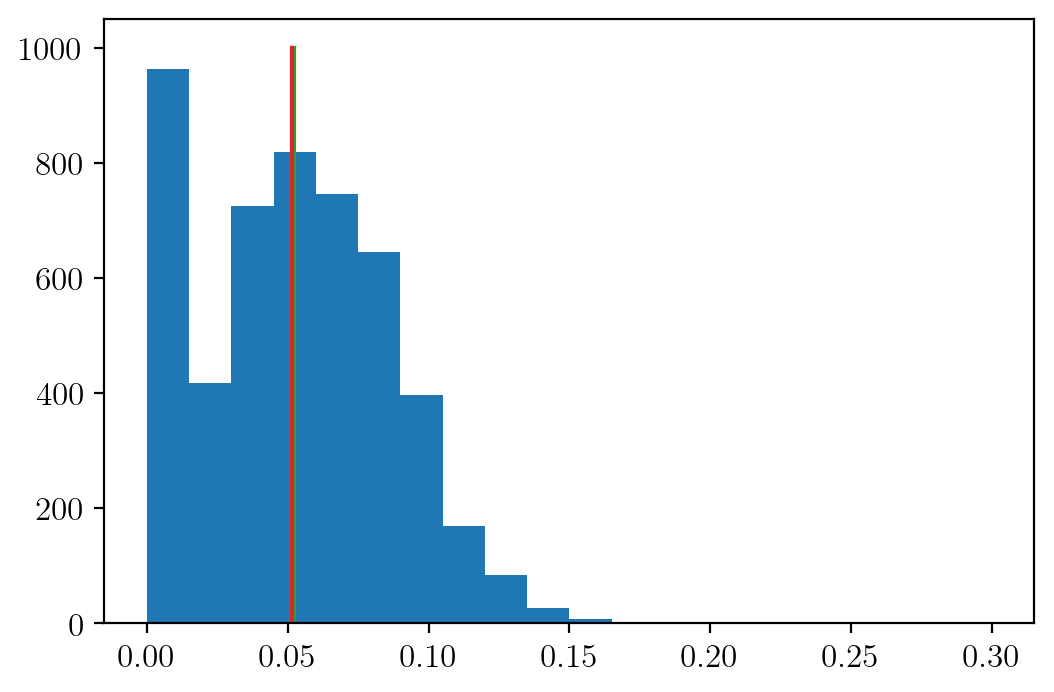

In [15]:
c=0
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)

Mean sys err 0.05000000000000001
0.05408861798013994 0.05389361672992202 0.05000000000000001


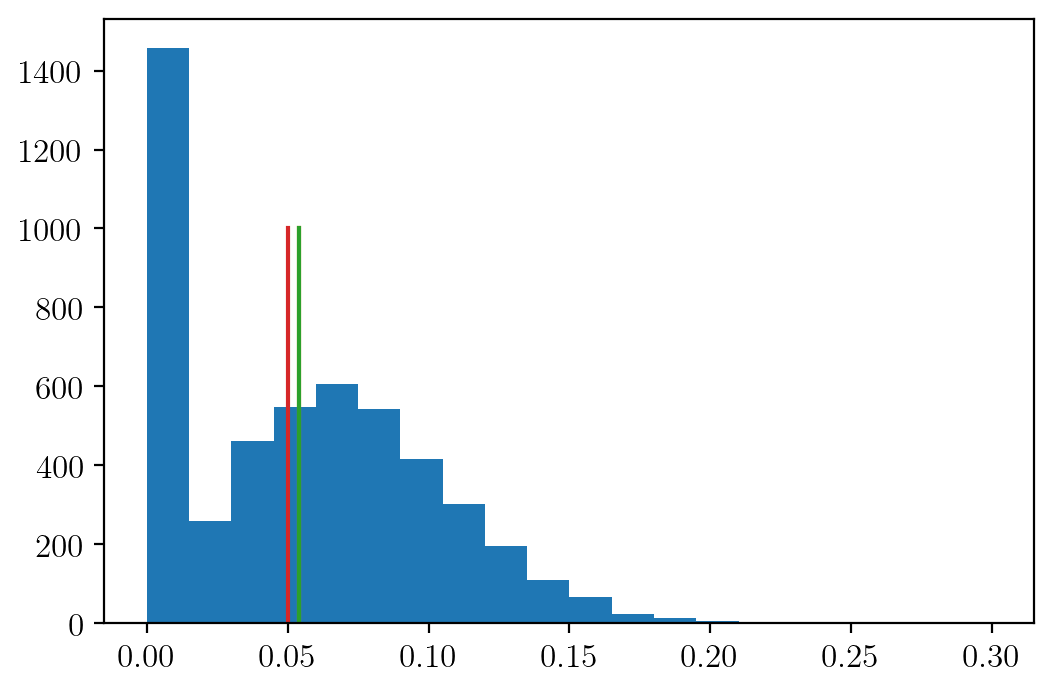

In [16]:
c=1
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)

Mean sys err 0.05000000000000001
0.049887479071506514 0.050801939769261756 0.05000000000000001


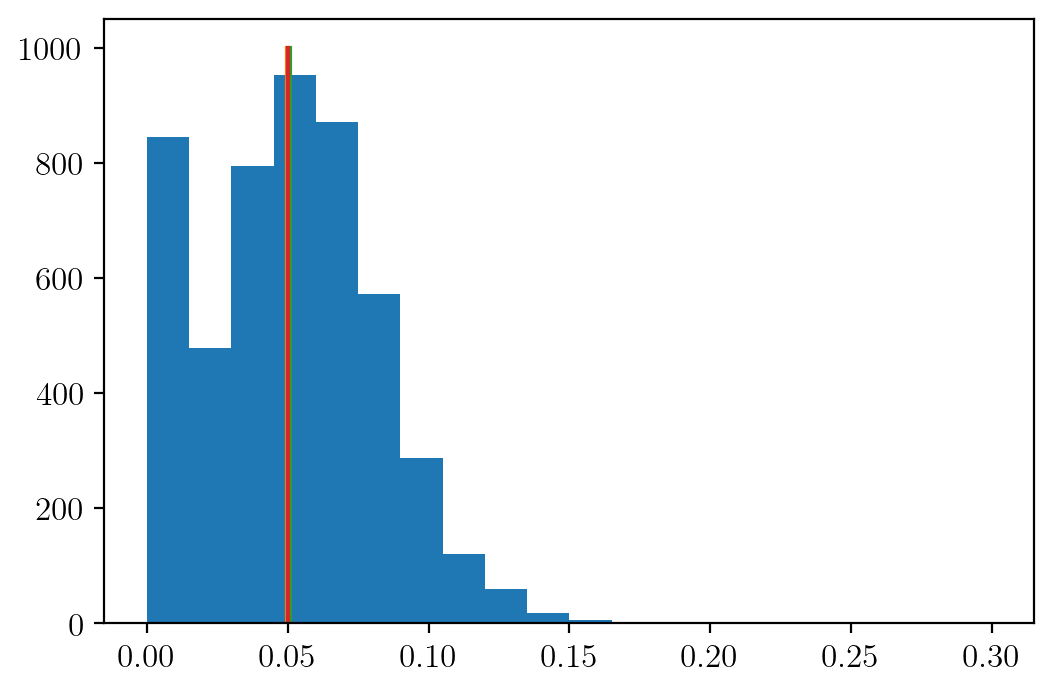

In [17]:
c=2
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)

# -------- C1 ---------

In [18]:
des_syserr=np.array([0.02,0.02,0.02])
cfht_syserr=np.array([0.11,0.11,0.11])
hsc_syserr=np.array([0.05,0.05,0.05])
cs82_syserr=np.array([0.06,0.06,0.06])
kids_syserr=np.array([0.04,0.04,0.04])

lensbin=2
ntest=5000

sigest_low = np.zeros(ntest)
sigest_high = np.zeros(ntest)
sigest_all = np.zeros(ntest)

r = lensbin

for k in range(0,ntest):
        
    for c in range(0,3):   # Each column is a different radial range
                 
        # Read in the files
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])         
           
        # Now draw new amplitudes with this statistical and sys error
        #print(allamp)
            
        # Compute the weighted mean
        # inverse variance mean     
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        
        # this is where the main part of the test is
        # Expect an amplitude of 0
        # for each survey draw an amplitude with mean of 1 and
        # including statistical and systematic error
        # Note that not all sys errors mean exactly the same thing though
        
        # Now add statistical and systematic error to data vecor
        # Statistical is drawn each time anew for each radial bin
        # systematic is an offset that is the same in all bins
        
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        data[0] = 0 + np.random.normal(0,errs[0],1)[0]+ np.random.normal(0,des_syserr[c],1)[0]
        data[1] = 0 + np.random.normal(0,errs[1],1)[0]+ np.random.normal(0,cfht_syserr[c],1)[0]
        data[2] = 0 + np.random.normal(0,errs[2],1)[0]+ np.random.normal(0,hsc_syserr[c],1)[0]
        data[3] = 0 + np.random.normal(0,errs[3],1)[0]+ np.random.normal(0,cs82_syserr[c],1)[0]
        data[4] = 0 + np.random.normal(0,errs[4],1)[0]+ np.random.normal(0,kids_syserr[c],1)[0]

        if(r<=2):
            data[5] = 0 + np.random.normal(0,errs[0],1)[0]+ np.random.normal(0,sdss_syserr[c],1)[0]

        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean
        wmean = np.average(data, weights=wht) # inverse variance mean
            
        n=len(data)
        data2 = np.zeros(n)
        errs2 = np.zeros(n) 
        
        #Compute reduced chi2
        chi2=0.0

        for i in range(0, n):
            chi2+=((data[i]-wmean)**2)/(errs[i]**2)
    
        rchi2 = chi2/(n-1)
        #print("Reduced chi2: ", rchi2)
    
        # This is the Sigma SYS part
        # Sigmasys is value that sets chi=1
    
        # If reduces chi2 >1 then proceed 
        if (rchi2>1):
        
            # Find the value that makes rchi2=1
            # Set global variables
            for i in range(0, n):
                data2[i]=data[i]
                errs2[i]=errs[i]
                
            #print(data2)
            #print(errs2)

            sol=optimize.root_scalar(computechi2minus1, bracket=[0,2.0])
            sigmasys=sol.root  
            
            if(c==0):
                sigest_low[k]=sigmasys  
            if(c==1):
                sigest_high[k]=sigmasys 
            if(c==2):
                sigest_all[k]=sigmasys 
            
        # this is a kludge
        # because we only get an upper limit in this case
        # this is why the paper says "estimate" for this number
        #if (rchi2<1):
        # do nothing. Tested and didn't have huge impact.
                            


IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
c=0
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)

In [ ]:
c=1
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)

In [ ]:
c=2
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)

# --------- C2 ---------

In [ ]:
lensbin=3
ntest=5000

des_syserr=np.array([0.03,0.03,0.03])
cfht_syserr=np.array([0.11,0.11,0.11])
hsc_syserr=np.array([0.05,0.05,0.05])
cs82_syserr=np.array([0.06,0.06,0.06])
kids_syserr=np.array([0.04,0.04,0.04])
        
sigest_low = np.zeros(ntest)
sigest_high = np.zeros(ntest)
sigest_all = np.zeros(ntest)

r = lensbin

for k in range(0,ntest):
        
    for c in range(0,3):   # Each column is a different radial range
                 
        # Read in the files
        allamp = np.loadtxt(amparray_wtot[r])
        allamp_errs = np.loadtxt(amparray_errs_wtot[r])         
           
        # Now draw new amplitudes with this statistical and sys error
        #print(allamp)
            
        # Compute the weighted mean
        # inverse variance mean     
        data=allamp[c,:] # C determines which radial range
        errs=allamp_errs[c,:]
        
        # this is where the main part of the test is
        # Expect an amplitude of 0
        # for each survey draw an amplitude with mean of 1 and
        # including statistical and systematic error
        # Note that not all sys errors mean exactly the same thing though
        
        # Now add statistical and systematic error to data vecor
        # Statistical is drawn each time anew for each radial bin
        # systematic is an offset that is the same in all bins
        
        # DES, CFHT, HSC,CS82,KiDS,SDSS 
        data[0] = 0 + np.random.normal(0,errs[0],1)[0]+ np.random.normal(0,des_syserr[c],1)[0]
        data[1] = 0 + np.random.normal(0,errs[1],1)[0]+ np.random.normal(0,cfht_syserr[c],1)[0]
        data[2] = 0 + np.random.normal(0,errs[2],1)[0]+ np.random.normal(0,hsc_syserr[c],1)[0]
        data[3] = 0 + np.random.normal(0,errs[3],1)[0]+ np.random.normal(0,cs82_syserr[c],1)[0]
        data[4] = 0 + np.random.normal(0,errs[4],1)[0]+ np.random.normal(0,kids_syserr[c],1)[0]

        if(r<=2):
            data[5] = 0 + np.random.normal(0,errs[0],1)[0]+ np.random.normal(0,sdss_syserr[c],1)[0]

        wht = 1.0/(allamp_errs[c,:]**2)
        meanamp = np.average(data, weights=wht) # inverse variance mean
        wmean = np.average(data, weights=wht) # inverse variance mean
            
        n=len(data)
        data2 = np.zeros(n)
        errs2 = np.zeros(n) 
        
        #Compute reduced chi2
        chi2=0.0

        for i in range(0, n):
            chi2+=((data[i]-wmean)**2)/(errs[i]**2)
    
        rchi2 = chi2/(n-1)
        #print("Reduced chi2: ", rchi2)
    
        # This is the Sigma SYS part
        # Sigmasys is value that sets chi=1
    
        # If reduces chi2 >1 then proceed 
        if (rchi2>1):
        
            # Find the value that makes rchi2=1
            # Set global variables
            for i in range(0, n):
                data2[i]=data[i]
                errs2[i]=errs[i]
                
            #print(data2)
            #print(errs2)

            sol=optimize.root_scalar(computechi2minus1, bracket=[0,2.0])
            sigmasys=sol.root  
            
            if(c==0):
                sigest_low[k]=sigmasys  
            if(c==1):
                sigest_high[k]=sigmasys 
            if(c==2):
                sigest_all[k]=sigmasys 
            
        # this is a kludge
        # because we only get an upper limit in this case
        # this is why the paper says "estimate" for this number
        #if (rchi2<1):
        # do nothing. Tested and didn't have huge impact.
                            



In [ ]:
c=0
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)

In [ ]:
c=1
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)

In [ ]:
c=2
meansyserr = (des_syserr[c]+cfht_syserr[c]+hsc_syserr[c]+cs82_syserr[c]+kids_syserr[c]+sdss_syserr[c])/6.0
print('Mean sys err',meansyserr)

if(c==0):
     sigest=sigest_low 
if(c==1):
    sigest=sigest_high
if(c==2):
    sigest= sigest_all

y=1000
plt.hist(sigest,bins=20,range=[0,0.30])
#plt.plot([sigsys,sigsys],[0,y])
plt.plot([np.mean(sigest),np.mean(sigest)],[0,y])
plt.plot([np.median(sigest),np.median(sigest)],[0,y])
plt.plot([meansyserr,meansyserr],[0,y])
          
print(np.mean(sigest),np.median(sigest),meansyserr)